# QAP solver using SGA

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib
from functools import partial, reduce
from collections import defaultdict, Counter

def compose(*funcs):
    return reduce(lambda f, g: lambda *args: f(*g(*args)), funcs, lambda *args: args)

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [88]:
from sga import *
from operators import *
from mutations import *
from plot import *

In [169]:
opts = {
   12: 578, 
   14: 1014,
   15: 1150,
   '16a': 1610,
   16: 1610,
   17: 1732,
   18: 1930,
   20: 2570,
   21: 2438,
   22: 3596,
   24: 3488,
   25: 3744,
   27: 5234,
   28: 5166,
   30: 6124,
   50: 5040000,
   60: 7453532,
}

In [149]:
nug_instance = 12
results = {}


def get_tai_name(n):
    return 'tai{}a'.format(n)


def get_qap_instance_url(name):
    return 'http://anjos.mgi.polymtl.ca/qaplib/data.d/{}.dat'.format(name)


def get_qap_data(nug_instance, get_name=lambda n: 'nug{}'.format(n)):
    qap_instance_file = urllib.urlopen(get_qap_instance_url(get_name(nug_instance)))
    
    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Fetching problem size: %d' % n)
    print('OPT: %d' % opts[n])

    A = np.empty((n, n))
    if n <= 30:
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))

    B = np.empty((n, n))
    if n != 50:
        qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    return A, B


flow, distance = get_qap_data(nug_instance)


Fetching problem size: 12
OPT: 578


In [173]:
def qap_objective_function(n, A, perm):
    flow, distance = A
    s = 0.0
    for i in range(n):
        s += (flow[i, :] * distance[perm[i], perm]).sum()
    return s

Fetching problem size: 12
  0     0.09416008 min: 664.00000000 mean: 768.10400000 max: 808.00000000 std:  30.29094228
 10     0.98322606 min: 582.00000000 mean: 628.04800000 max: 650.00000000 std:  14.17539051
 20     2.61115694 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 30     5.07575011 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 40     6.86019993 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 50     8.46484709 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 60    10.08454895 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 70    11.68784189 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 80    13.50042510 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 90    14.62182212 min: 578.00000000 mean: 578.00000000 max: 578.00000000 std:   0.00000000
 99    15.85056710 min: 578.00000000 mean: 578.0000000

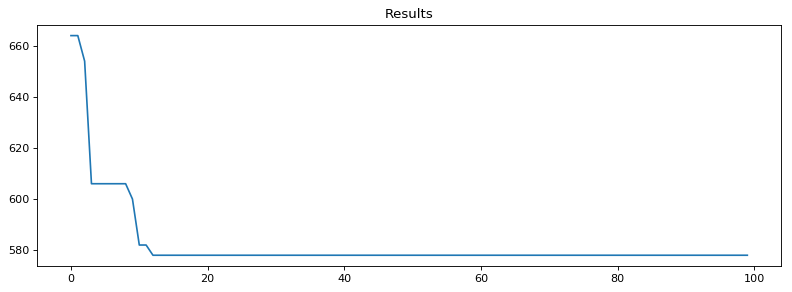

In [20]:
n = 12
flow, distance = get_qap_data(n)
params = {
    'T': 100,
    'population_size': 500,
    'chromosome_length': n,
    'crossover_probability': 0.95,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': reverse_sequence_mutation,
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 14
  0     0.15951300 min: 1156.00000000 mean: 1306.25714286 max: 1354.00000000 std:  37.02249730
  5     0.85472298 min: 1116.00000000 mean: 1197.05714286 max: 1228.00000000 std:  25.75160784
 10     3.40505600 min: 1040.00000000 mean: 1127.54285714 max: 1154.00000000 std:  18.30962722
 15     4.72333097 min: 1016.00000000 mean: 1050.21142857 max: 1058.00000000 std:   7.68158360
 20     6.29114199 min: 1016.00000000 mean: 1016.00000000 max: 1016.00000000 std:   0.00000000
 25     9.10061502 min: 1016.00000000 mean: 1016.00000000 max: 1016.00000000 std:   0.00000000
 30    10.62515593 min: 1016.00000000 mean: 1016.00000000 max: 1016.00000000 std:   0.00000000
 35    11.83725905 min: 1016.00000000 mean: 1016.00000000 max: 1016.00000000 std:   0.00000000
 40    12.73937798 min: 1016.00000000 mean: 1016.00000000 max: 1016.00000000 std:   0.00000000
 45    13.97426105 min: 1016.00000000 mean: 1016.00000000 max: 1016.00000000 std:   0.00000000
 49    15.41562796 min: 

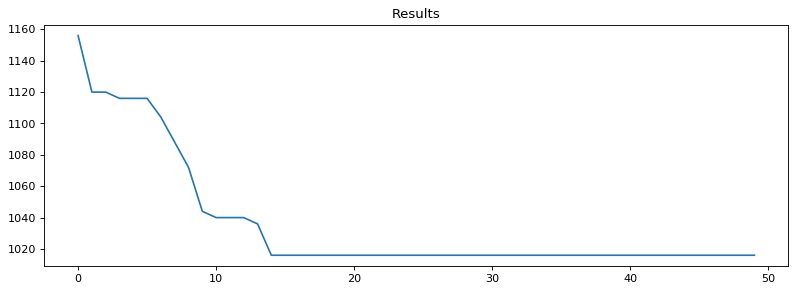

In [33]:
n = 14
flow, distance = get_qap_data(n)
params = {
    'T': 50,
    'population_size': 700,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': reverse_sequence_mutation,
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 16
  0     0.14563584 min: 1864.00000000 mean: 2075.77600000 max: 2146.00000000 std:  53.66426953
  5     0.67087698 min: 1732.00000000 mean: 1896.13200000 max: 1946.00000000 std:  37.80929219
 10     2.74020100 min: 1680.00000000 mean: 1792.03200000 max: 1820.00000000 std:  22.35493180
 15     3.74826694 min: 1666.00000000 mean: 1718.83200000 max: 1744.00000000 std:  24.30859469
 20     6.33100486 min: 1634.00000000 mean: 1663.29200000 max: 1666.00000000 std:   5.65143663
 25     8.37092280 min: 1622.00000000 mean: 1622.00000000 max: 1622.00000000 std:   0.00000000
 30     9.42439985 min: 1622.00000000 mean: 1622.00000000 max: 1622.00000000 std:   0.00000000
 35    11.00385189 min: 1622.00000000 mean: 1622.00000000 max: 1622.00000000 std:   0.00000000
 40    12.02325583 min: 1622.00000000 mean: 1622.00000000 max: 1622.00000000 std:   0.00000000
 45    12.46934700 min: 1622.00000000 mean: 1622.00000000 max: 1622.00000000 std:   0.00000000
 49    13.42639399 min: 

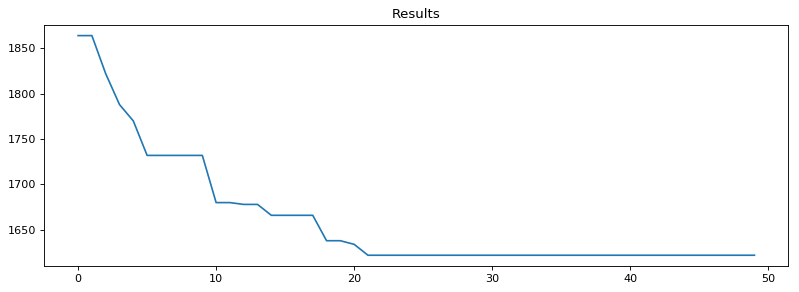

In [37]:
problem_name = '16a'
n = 16
flow, distance = get_qap_data(problem_name)
params = {
    'T': 50,
    'population_size': 500,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': two_scramble_mutation,
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(problem_name, opts, **results)

Fetching problem size: 17
OPT: 1732
  0     0.22069192 min: 2014.00000000 mean: 2242.36400000 max: 2318.00000000 std:  56.10079771
  5     1.30742097 min: 1920.00000000 mean: 2070.83800000 max: 2116.00000000 std:  36.12076627
 10     5.64432788 min: 1866.00000000 mean: 1975.78000000 max: 2016.00000000 std:  31.83745593
 15    11.33473897 min: 1828.00000000 mean: 1901.43800000 max: 1932.00000000 std:  21.06637501
 20    16.28793907 min: 1794.00000000 mean: 1856.13600000 max: 1874.00000000 std:  12.74823533
 25    23.18003392 min: 1794.00000000 mean: 1818.79800000 max: 1832.00000000 std:   9.60787156
 30    26.19214892 min: 1788.00000000 mean: 1793.85800000 max: 1794.00000000 std:   0.90323640
 35    29.81603789 min: 1788.00000000 mean: 1788.00000000 max: 1788.00000000 std:   0.00000000
 40    36.61019492 min: 1788.00000000 mean: 1788.00000000 max: 1788.00000000 std:   0.00000000
 45    39.45948291 min: 1788.00000000 mean: 1788.00000000 max: 1788.00000000 std:   0.00000000
 49    44.2580

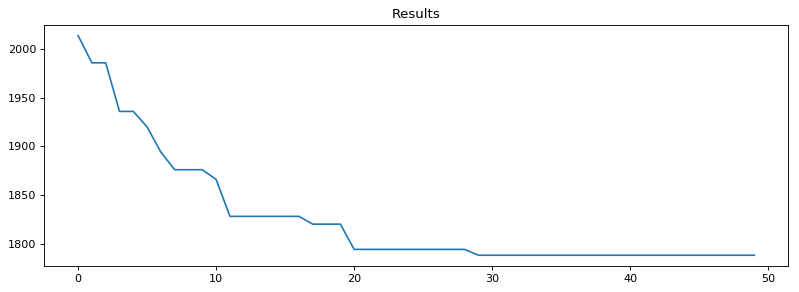

In [61]:
n = 17
flow, distance = get_qap_data(n)
params = {
    'T': 50,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': two_scramble_mutation,
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 20
OPT: 2570
  0     0.26294684 min: 3074.00000000 mean: 3304.13800000 max: 3396.00000000 std:  70.37443397
  4     1.30763483 min: 2882.00000000 mean: 3117.34600000 max: 3178.00000000 std:  50.69517022
  8     4.97021604 min: 2810.00000000 mean: 2991.21000000 max: 3056.00000000 std:  52.52698259
 12    10.71187901 min: 2778.00000000 mean: 2861.69200000 max: 2894.00000000 std:  27.21986657
 16    21.32954288 min: 2706.00000000 mean: 2779.97200000 max: 2798.00000000 std:  12.78808883
 20    23.58091903 min: 2688.00000000 mean: 2729.60000000 max: 2748.00000000 std:  14.34628872
 24    25.69681406 min: 2658.00000000 mean: 2695.11800000 max: 2702.00000000 std:   8.41439695
 28    30.44335103 min: 2652.00000000 mean: 2666.52800000 max: 2670.00000000 std:   3.84203280
 32    37.53923988 min: 2640.00000000 mean: 2651.98800000 max: 2652.00000000 std:   0.37928354
 36    44.57647800 min: 2640.00000000 mean: 2640.00000000 max: 2640.00000000 std:   0.00000000
 39    45.2576

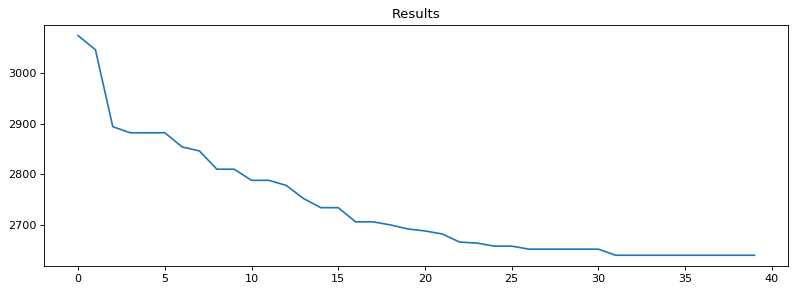

In [59]:
n = 20
flow, distance = get_qap_data(n)
params = {
    'T': 40,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 22
OPT: 3596
  0     0.29917121 min: 4212.00000000 mean: 4940.01200000 max: 5134.00000000 std: 141.97368720
  5     1.65635419 min: 4096.00000000 mean: 4501.85600000 max: 4604.00000000 std:  87.67906970
 10    13.63750219 min: 3850.00000000 mean: 4230.94000000 max: 4338.00000000 std:  91.31525831
 15    23.70481920 min: 3722.00000000 mean: 3905.68400000 max: 3980.00000000 std:  47.29088859
 20    33.76608419 min: 3630.00000000 mean: 3717.12800000 max: 3750.00000000 std:  23.93373385
 25    40.25722504 min: 3618.00000000 mean: 3631.91000000 max: 3638.00000000 std:   2.95497885
 30    59.06086922 min: 3616.00000000 mean: 3616.00000000 max: 3616.00000000 std:   0.00000000
 35    69.01961112 min: 3606.00000000 mean: 3606.00000000 max: 3606.00000000 std:   0.00000000
 40    75.61265707 min: 3606.00000000 mean: 3606.00000000 max: 3606.00000000 std:   0.00000000
 45    83.85453820 min: 3606.00000000 mean: 3606.00000000 max: 3606.00000000 std:   0.00000000
 49    88.2954

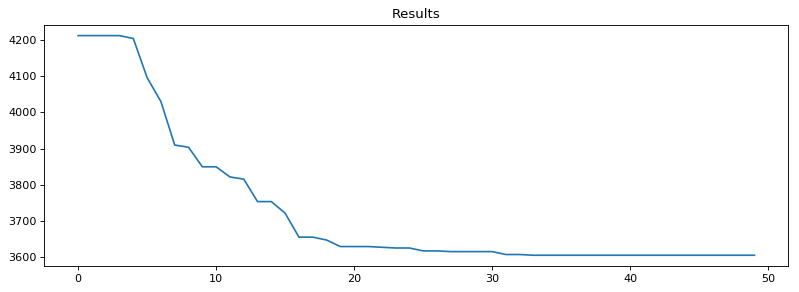

In [57]:
n = 22
flow, distance = get_qap_data(n)
params = {
    'T': 50,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 24
OPT: 3488
  0     0.32107902 min: 4188.00000000 mean: 4626.14200000 max: 4756.00000000 std:  98.21364384
  5     1.80276394 min: 3842.00000000 mean: 4327.19600000 max: 4410.00000000 std:  69.82659654
 10    13.24332595 min: 3838.00000000 mean: 4154.10800000 max: 4236.00000000 std:  70.87592212
 15    19.76176691 min: 3770.00000000 mean: 3868.77600000 max: 3928.00000000 std:  33.58186749
 20    43.96259713 min: 3706.00000000 mean: 3787.75400000 max: 3806.00000000 std:  15.24229261
 25    60.69862294 min: 3644.00000000 mean: 3693.54400000 max: 3716.00000000 std:  18.35799728
 30    74.78408408 min: 3600.00000000 mean: 3639.00200000 max: 3650.00000000 std:  11.20214247
 35    83.61752796 min: 3598.00000000 mean: 3598.44000000 max: 3600.00000000 std:   0.82849261
 40    97.68405294 min: 3590.00000000 mean: 3592.68400000 max: 3594.00000000 std:   1.87939990
 45   101.49898911 min: 3590.00000000 mean: 3590.00000000 max: 3590.00000000 std:   0.00000000
 49   112.5715

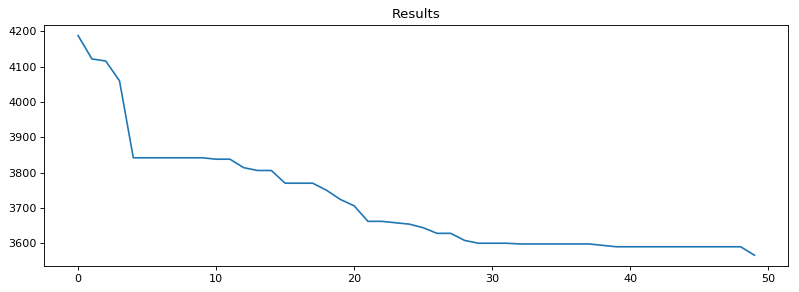

In [62]:
n = 24
flow, distance = get_qap_data(n)
params = {
    'T': 50,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 3,
    'mutation_operator': k_scramble_mutation(5),
    'objective_func': qap_objective_function,
}

results = sga(**params)

plot_sga_results(n, opts, **results)

Fetching problem size: 27
OPT: 5234
  0     0.34860206 min: 6326.00000000 mean: 6915.30800000 max: 7094.00000000 std: 135.83790758
 10     3.42800999 min: 5932.00000000 mean: 6232.55000000 max: 6330.00000000 std:  72.16967161
 20     6.38206792 min: 5626.00000000 mean: 5802.13800000 max: 5848.00000000 std:  36.39385877
 30     9.30648303 min: 5504.00000000 mean: 5567.30000000 max: 5592.00000000 std:  18.08773065
 40    12.12905598 min: 5468.00000000 mean: 5495.23800000 max: 5498.00000000 std:   7.34352477
 50    14.92320299 min: 5452.00000000 mean: 5455.99200000 max: 5456.00000000 std:   0.15471264
 60    17.71695304 min: 5372.00000000 mean: 5399.74400000 max: 5410.00000000 std:  11.36056618
 70    20.47939110 min: 5372.00000000 mean: 5372.00000000 max: 5372.00000000 std:   0.00000000
 80    23.26060295 min: 5372.00000000 mean: 5372.00000000 max: 5372.00000000 std:   0.00000000
 90    26.02030492 min: 5364.00000000 mean: 5365.64000000 max: 5372.00000000 std:   3.22961298
 99    28.5164

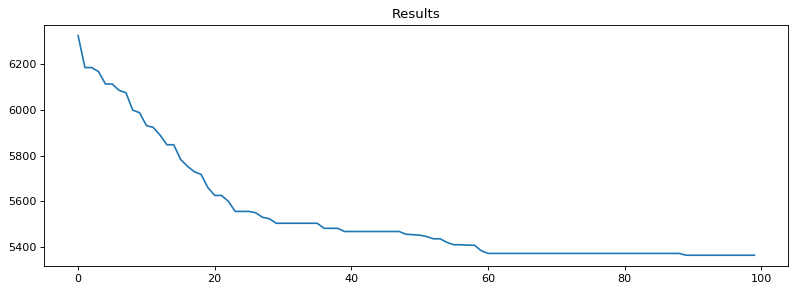

In [121]:
n = 27
flow, distance = get_qap_data(n)
params = {
    'T': 100,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.20,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.0000,
    'local_search_k': 3,
    'mutation_operator': k_scramble_mutation(5),
    'objective_func': qap_objective_function,
}

results['nug_{}'.format(n)] = sga(**params)

plot_sga_results(n, opts, **results['nug_{}'.format(n)])

Fetching problem size: 28
OPT: 5166
  0     0.38113904 min: 6168.00000000 mean: 6741.06400000 max: 6902.00000000 std: 122.67852259
 10     3.65144515 min: 5806.00000000 mean: 6116.74600000 max: 6220.00000000 std:  73.84215249
 20     6.75527716 min: 5608.00000000 mean: 5730.60800000 max: 5780.00000000 std:  33.38596016
 30     9.66947007 min: 5398.00000000 mean: 5448.87000000 max: 5468.00000000 std:  14.50238256
 40    17.23629117 min: 5344.00000000 mean: 5352.25000000 max: 5356.00000000 std:   3.25906428
 50    20.03586507 min: 5336.00000000 mean: 5336.00000000 max: 5336.00000000 std:   0.00000000
 60    22.84908199 min: 5336.00000000 mean: 5336.00000000 max: 5336.00000000 std:   0.00000000
 70    30.41822314 min: 5326.00000000 mean: 5326.00000000 max: 5326.00000000 std:   0.00000000
 80    33.21211505 min: 5326.00000000 mean: 5326.00000000 max: 5326.00000000 std:   0.00000000
 90    40.72684503 min: 5316.00000000 mean: 5316.00000000 max: 5316.00000000 std:   0.00000000
 99    43.2568

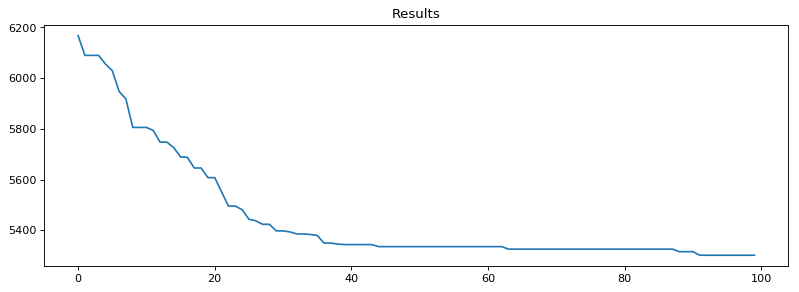

In [122]:
n = 28
flow, distance = get_qap_data(n)
params = {
    'T': 100,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.20,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.0001,
    'local_search_k': 3,
    'mutation_operator': k_scramble_mutation(5),
    'objective_func': qap_objective_function,
}

results['nug_{}'.format(n)] = sga(**params)

plot_sga_results(n, opts, **results['nug_{}'.format(n)])

Fetching problem size: 28
OPT: 5166
  0     0.35148406 min: 6242.00000000 mean: 6742.65800000 max: 6908.00000000 std: 118.40751258
 10     3.54570985 min: 5942.00000000 mean: 6194.36000000 max: 6278.00000000 std:  63.33275930
 20     6.67662406 min: 5762.00000000 mean: 5956.56000000 max: 6016.00000000 std:  42.01969062
 30     9.91164494 min: 5578.00000000 mean: 5708.01200000 max: 5760.00000000 std:  36.91113458
 40    12.74882603 min: 5384.00000000 mean: 5464.09000000 max: 5478.00000000 std:   9.53917711
 50    15.66068006 min: 5340.00000000 mean: 5340.00000000 max: 5340.00000000 std:   0.00000000
 60    18.71298790 min: 5340.00000000 mean: 5340.00000000 max: 5340.00000000 std:   0.00000000
 70    21.60597897 min: 5340.00000000 mean: 5340.00000000 max: 5340.00000000 std:   0.00000000
 80    24.31083393 min: 5322.00000000 mean: 5322.00000000 max: 5322.00000000 std:   0.00000000
 90    27.22160602 min: 5322.00000000 mean: 5322.00000000 max: 5322.00000000 std:   0.00000000
 99    30.3781

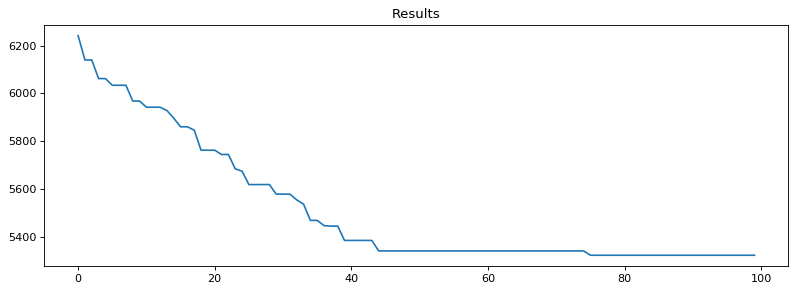

In [128]:
n = 28
flow, distance = get_qap_data(n)
params = {
    'T': 100,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.20,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.0001,
    'local_search_k': 2,
    'mutation_operator': k_scramble_mutation(5),
    'objective_func': qap_objective_function,
}

results['nug_{}_c'.format(n)] = sga(**params)

plot_sga_results(n, opts, **results['nug_{}_c'.format(n)])

In [106]:
print(results)

{'best_value': 5302.0, 'costs': array([ 6336.,  6222.,  6154.,  6154.,  6154.,  6046.,  5894.,  5894.,
        5894.,  5880.,  5880.,  5880.,  5870.,  5860.,  5808.,  5808.,
        5796.,  5770.,  5728.,  5728.,  5658.,  5644.,  5608.,  5604.,
        5584.,  5562.,  5534.,  5530.,  5510.,  5506.,  5488.,  5480.,
        5448.,  5416.,  5416.,  5388.,  5388.,  5388.,  5388.,  5384.,
        5360.,  5356.,  5356.,  5322.,  5322.,  5302.,  5302.,  5302.,
        5302.,  5302.,  5302.,  5302.,  5302.,  5302.,  5302.,  5302.,
        5302.,  5302.,  5302.,  5302.,  5302.,  5302.,  5302.,  5302.,
        5302.,  5302.,  5302.,  5302.,  5302.,  5302.]), 'nug_27': {'best_value': 5260.0, 'costs': array([ 6070.,  6070.,  6070.,  6070.,  6070.,  5984.,  5984.,  5984.,
        5984.,  5984.,  5984.,  5888.,  5888.,  5836.,  5804.,  5768.,
        5768.,  5720.,  5648.,  5592.,  5550.,  5520.,  5496.,  5486.,
        5474.,  5474.,  5474.,  5474.,  5474.,  5474.,  5474.,  5474.,
        5466.,  5

Fetching problem size: 50
OPT: 5040000
  0     0.54698610 min: 5683604.00000000 mean: 5850843.56600000 max: 5898446.00000000 std: 36615.92739287
 15     8.74002910 min: 5593478.00000000 mean: 5663948.96200000 max: 5684686.00000000 std: 16703.67081352
 30    16.10752320 min: 5374056.00000000 mean: 5426889.67400000 max: 5441292.00000000 std: 12565.39615109
 45    27.31144905 min: 5305270.00000000 mean: 5314407.95200000 max: 5316378.00000000 std: 2856.20018446
 60    38.30611610 min: 5236988.00000000 mean: 5236988.00000000 max: 5236988.00000000 std:   0.00000000
 75    49.46786499 min: 5233894.00000000 mean: 5233894.00000000 max: 5233894.00000000 std:   0.00000000
 90    58.98543000 min: 5220006.00000000 mean: 5220006.00000000 max: 5220006.00000000 std:   0.00000000
105    69.28999805 min: 5218298.00000000 mean: 5218298.00000000 max: 5218298.00000000 std:   0.00000000
120    78.96471500 min: 5195830.00000000 mean: 5195830.00000000 max: 5195830.00000000 std:   0.00000000
135    90.18546700

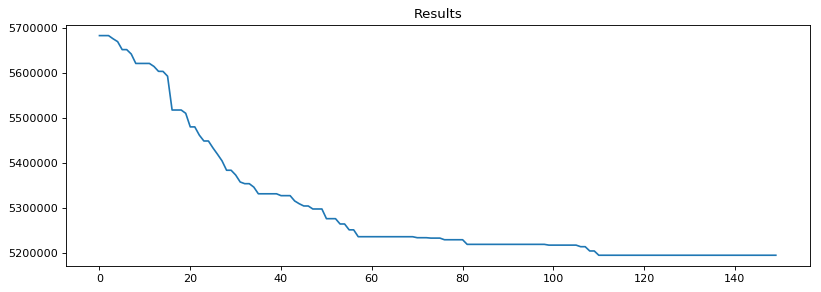

In [171]:
n = 50
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 10,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])

Fetching problem size: 60
OPT: 7453532
  0     0.64383793 min: 8286692.00000000 mean: 8457417.02600000 max: 8511446.00000000 std: 41961.86640672
 15    10.38441896 min: 8130920.00000000 mean: 8220596.37200000 max: 8247296.00000000 std: 22640.91830871
 30    19.20897794 min: 7928542.00000000 mean: 8006423.29200000 max: 8023138.00000000 std: 13726.35446179
 45    77.20310307 min: 7809752.00000000 mean: 7843199.68400000 max: 7849340.00000000 std: 6348.92025246
 60   126.21801305 min: 7751322.00000000 mean: 7754372.94600000 max: 7754376.00000000 std:  96.52765968
 75   180.51417494 min: 7720232.00000000 mean: 7730556.58800000 max: 7735570.00000000 std: 7147.75151207
 90   237.25541997 min: 7675030.00000000 mean: 7675030.00000000 max: 7675030.00000000 std:   0.00000000
105   297.27776194 min: 7665304.00000000 mean: 7665304.00000000 max: 7665304.00000000 std:   0.00000000
120   349.12310195 min: 7658388.00000000 mean: 7658388.00000000 max: 7658388.00000000 std:   0.00000000
135   404.0256669

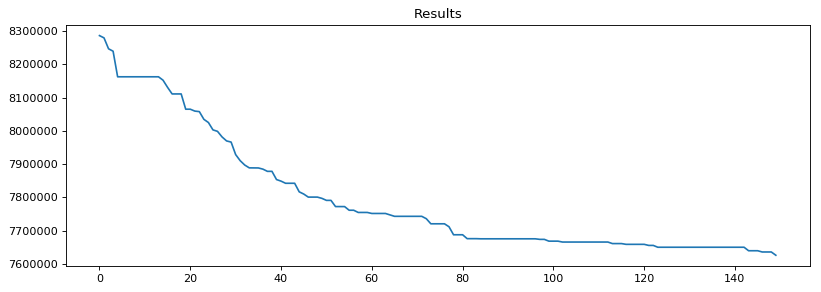

In [172]:
n = 60
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.01,
    'local_search_k': 10,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])

Fetching problem size: 60
OPT: 7453532
  0     2.62033796 min: 8259434.00000000 mean: 8460493.78600000 max: 8517836.00000000 std: 44619.32675187
 15    41.70956612 min: 8212618.00000000 mean: 8326755.30600000 max: 8367322.00000000 std: 30057.95516096
 30    81.21170712 min: 8200274.00000000 mean: 8267867.29200000 max: 8292916.00000000 std: 17896.83765548
 45   121.09540009 min: 8177902.00000000 mean: 8218921.11200000 max: 8259434.00000000 std: 14962.52534178
 60   160.24297309 min: 8166638.00000000 mean: 8196993.75200000 max: 8210602.00000000 std: 8207.71923219
 75   201.54381418 min: 8104314.00000000 mean: 8171910.32200000 max: 8177902.00000000 std: 12706.87363297
 90   242.08145618 min: 8089042.00000000 mean: 8109435.19200000 max: 8132974.00000000 std: 10267.31310495
105   282.28294516 min: 8070548.00000000 mean: 8088497.25400000 max: 8098300.00000000 std: 3975.30468562
120   323.43134618 min: 8033074.00000000 mean: 8072664.53600000 max: 8080028.00000000 std: 10795.38859295
135   363

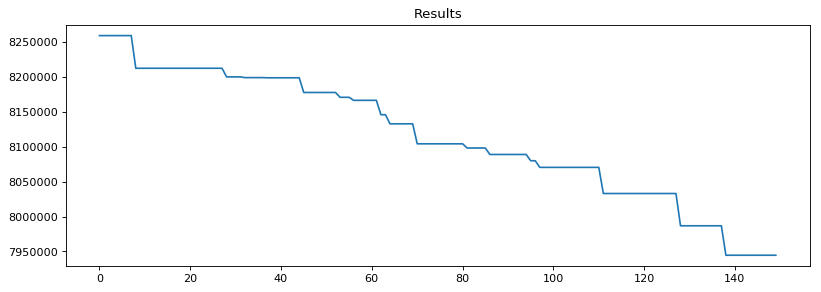

In [176]:
n = 60
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': ex_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 4,
    'mutation_operator': reverse_sequence_mutation,
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])

Fetching problem size: 60
OPT: 7453532
  0     0.60864496 min: 8277136.00000000 mean: 8457972.57400000 max: 8513970.00000000 std: 42237.34033467
 15     9.91274881 min: 8138990.00000000 mean: 8226287.38200000 max: 8261210.00000000 std: 19634.48289714
 30    19.20120883 min: 7931852.00000000 mean: 8006492.86200000 max: 8030170.00000000 std: 20479.89764928
 45    31.08133888 min: 7834520.00000000 mean: 7860253.37000000 max: 7871648.00000000 std: 6287.05515031
 60    42.77757788 min: 7742584.00000000 mean: 7748966.65800000 max: 7776596.00000000 std: 6992.29255073
 75    55.60886502 min: 7686258.00000000 mean: 7707653.55600000 max: 7707696.00000000 std: 777.73412093
 90    67.61914587 min: 7657164.00000000 mean: 7657235.78800000 max: 7657688.00000000 std: 180.17601132
105    79.15636396 min: 7621050.00000000 mean: 7621050.00000000 max: 7621050.00000000 std:   0.00000000
120    91.78931689 min: 7571280.00000000 mean: 7571797.49200000 max: 7573390.00000000 std: 907.33692416
135   103.8818438

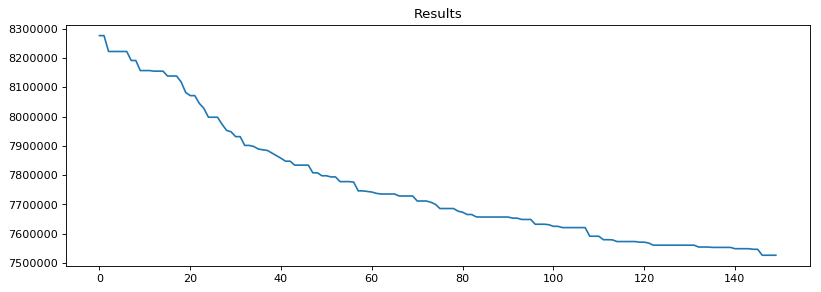

In [178]:
n = 60
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': ox_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 6,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])

Fetching problem size: 60
OPT: 7453532
  0     0.64086008 min: 8294058.00000000 mean: 8454345.12000000 max: 8507234.00000000 std: 41017.57031529
 15    10.22659111 min: 8133296.00000000 mean: 8235303.21400000 max: 8264344.00000000 std: 25000.56615523
 30    19.47790313 min: 7991652.00000000 mean: 8053257.13200000 max: 8070368.00000000 std: 16193.67604142
 45    29.85577416 min: 7817984.00000000 mean: 7873680.06200000 max: 7890980.00000000 std: 15609.20645696
 60    40.56354618 min: 7728958.00000000 mean: 7766669.74000000 max: 7774638.00000000 std: 7667.93963490
 75    50.28014708 min: 7694618.00000000 mean: 7694618.00000000 max: 7694618.00000000 std:   0.00000000
 90    60.81434417 min: 7653692.00000000 mean: 7657474.65000000 max: 7660722.00000000 std: 3218.64163856
105    69.93832612 min: 7629278.00000000 mean: 7629278.00000000 max: 7629278.00000000 std:   0.00000000
120    80.43058515 min: 7614316.00000000 mean: 7614316.00000000 max: 7614316.00000000 std:   0.00000000
135    89.83107

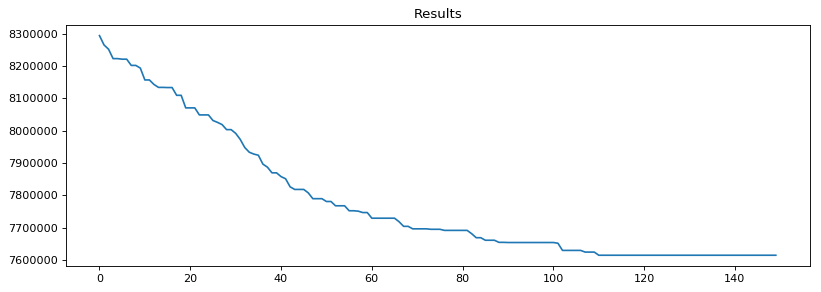

In [181]:
n = 60
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 1000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.35,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 4,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])

Fetching problem size: 60
OPT: 7453532
  0     0.97735691 min: 8240300.00000000 mean: 8455136.40266667 max: 8511564.00000000 std: 42973.52184681
 15    15.10981488 min: 8063270.00000000 mean: 8184784.98266667 max: 8221144.00000000 std: 26447.34580744
 30    27.70540404 min: 7844122.00000000 mean: 7900535.25200000 max: 7915562.00000000 std: 12188.64823144
 45    44.50256991 min: 7716158.00000000 mean: 7746496.00133333 max: 7759020.00000000 std: 7880.51019110
 60    61.51661706 min: 7658948.00000000 mean: 7672115.34000000 max: 7681662.00000000 std: 5587.21135252
 75    76.25633693 min: 7622220.00000000 mean: 7624078.76000000 max: 7624080.00000000 std:  48.00898249
 90    92.50941586 min: 7573020.00000000 mean: 7588770.04666667 max: 7588802.00000000 std: 705.10912287
105   108.75719500 min: 7531760.00000000 mean: 7536145.07466667 max: 7536148.00000000 std: 113.25990063
120   125.63142991 min: 7517270.00000000 mean: 7520414.16533333 max: 7525112.00000000 std: 2408.00850372
135   141.867579

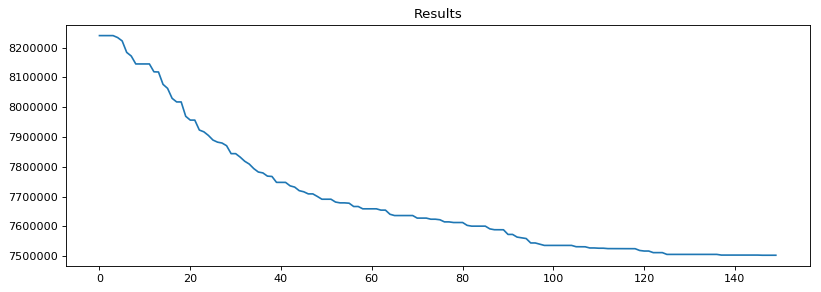

In [185]:
n = 60
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 1500,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.25,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 6,
    'mutation_operator': k_scramble_mutation(3),
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])

Fetching problem size: 60
OPT: 7453532
  0     1.25963998 min: 8249980.00000000 mean: 8453950.84600000 max: 8510594.00000000 std: 41861.77383065
 15    19.45988798 min: 8042468.00000000 mean: 8139819.02200000 max: 8168184.00000000 std: 23085.84410498
 30    35.62579489 min: 7849630.00000000 mean: 7922586.63200000 max: 7941798.00000000 std: 14846.39385375
 45    59.57542491 min: 7739700.00000000 mean: 7772888.46500000 max: 7784664.00000000 std: 7990.85766347
 60    83.42338586 min: 7661430.00000000 mean: 7662856.61200000 max: 7662866.00000000 std: 113.58474130
 75   105.75764799 min: 7585822.00000000 mean: 7591668.18400000 max: 7600600.00000000 std: 7207.32362574
 90   127.18005085 min: 7553236.00000000 mean: 7556927.47700000 max: 7566464.00000000 std: 5932.16786415
105   150.34351587 min: 7531288.00000000 mean: 7539102.09100000 max: 7539106.00000000 std: 174.77208507
120   172.31734300 min: 7531288.00000000 mean: 7531288.00000000 max: 7531288.00000000 std:   0.00000000
135   195.055408

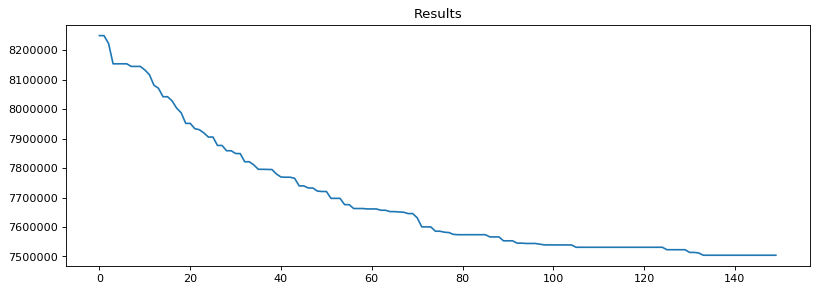

In [186]:
n = 60
problem_name = get_tai_name(n)
flow, distance = get_qap_data(n, get_tai_name)
params = {
    'T': 150,
    'population_size': 2000,
    'chromosome_length': n,
    'crossover_probability': 0.90,
    'mutation_probability': 0.30,
    'distance_matrix': (flow, distance),
    'crossover_operator': pmx_crossover,
    'local_search_probability': 0.001,
    'local_search_k': 7,
    'mutation_operator': k_scramble_mutation(4),
    'objective_func': qap_objective_function,
}

results[problem_name] = sga(**params)

plot_sga_results(n, opts, **results[problem_name])